## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 100)

#### 1. Cleanning Data What is missing 
- PlayerName	
- Born	
- Height	
- Hand	
- LinkPlayer	
- Tournament	
- Location	
#### 2. Organizar Notebook

### Reading Data Frame

In [2]:
sw = pd.read_json('atpplayers.json', lines=True)

In [3]:
sw.isna().any()

_id           False
PlayerName    False
Born          False
Height        False
Hand          False
LinkPlayer    False
Tournament    False
Location      False
Date          False
Ground        False
Prize         False
GameRound     False
GameRank      False
Oponent       False
WL            False
Score         False
dtype: bool

### Lenght of Data Frame

In [4]:
len(sw)

1308835

In [5]:
sw.head()

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
0,{'$oid': '624ab34913b144c54b3c9aba'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Davis Cup Finals,"Madrid, Spain",2021.11.22 - 2021.12.05,Hard,,Semi-Finals,30,Marin Cilic,W,64 62
1,{'$oid': '624ab34913b144c54b3c9abb'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Dubai,"Dubai, U.A.E.",2022.02.21 - 2022.02.26,Hard,"$2,794,840",Round of 16,26,Karen Khachanov,W,63 76
2,{'$oid': '624ab34913b144c54b3c9abc'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Nitto ATP Finals,"Turin, Italy",2021.11.15 - 2021.11.21,Hard,"$7,250,000",Round Robin,12,Cameron Norrie,W,62 61
3,{'$oid': '624ab34913b144c54b3c9abd'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Nitto ATP Finals,"Turin, Italy",2021.11.15 - 2021.11.21,Hard,"$7,250,000",Round Robin,5,Andrey Rublev,W,63 62
4,{'$oid': '624ab34913b144c54b3c9abe'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Paris,"Paris, France",2021.11.01 - 2021.11.07,Hard,"�5,207,405",Finals,2,Daniil Medvedev,W,46 63 63


### Selecting Only Switzerland

In [6]:
switzerland_sw = sw[sw['Location'].str.contains('Switzerland', case=False)]

In [7]:
switzerland_sw.head()

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
769,{'$oid': '624ab34913b144c54b3c9dbb'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Semi-Finals,32,Kei Nishikori,L,"62 67, 06"
770,{'$oid': '624ab34913b144c54b3c9dbc'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Quarter-Finals,59,Marcos Baghdatis,W,26 62 63
771,{'$oid': '624ab34913b144c54b3c9dbd'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Round of 16,64,Lukasz Kubot,W,61 62
772,{'$oid': '624ab34913b144c54b3c9dbe'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Round of 32,47,Xavier Malisse,W,62 46 75
858,{'$oid': '624ab34913b144c54b3c9e14'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2010.11.01 - 2010.11.07,Hard,"�1,225,000",Finals,2,Roger Federer,L,46 63 16


### Fix Id 

In [12]:
switzerland_sw._id = switzerland_sw._id.apply(lambda x: str(x).split(":")[1].split("'")[1].split("'")[0])

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\222526879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw._id = switzerland_sw._id.apply(lambda x: str(x).split(":")[1].split("'")[1].split("'")[0])


### Length with data frame with only switzerland

In [13]:
len(switzerland_sw)

14828

### Score_1

In [18]:
def retirar_espacos_virgulas(score):
    return score.replace(' ', '').replace(',', '').replace('-','')

# aplicar a função à coluna 'Score' e criar uma nova coluna 'Score_sem_espacos_virgulas'
switzerland_sw['Score_1'] = switzerland_sw['Score'].apply(retirar_espacos_virgulas)

switzerland_sw

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\2061059838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Score_1'] = switzerland_sw['Score'].apply(retirar_espacos_virgulas)


,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1
769,624ab34913b144c54b3c9dbb,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Semi-Finals,32,Kei Nishikori,L,"62 67, 06",626706
770,624ab34913b144c54b3c9dbc,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Quarter-Finals,59,Marcos Baghdatis,W,26 62 63,266263
771,624ab34913b144c54b3c9dbd,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Round of 16,64,Lukasz Kubot,W,61 62,6162
772,624ab34913b144c54b3c9dbe,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Round of 32,47,Xavier Malisse,W,62 46 75,624675
858,624ab34913b144c54b3c9e14,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2010.11.01 - 2010.11.07,Hard,"�1,225,000",Finals,2,Roger Federer,L,46 63 16,466316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305459,624ab49d7a94cd6550d4815b,Nicolas Parizzia,,NA,null,https://www.atptour.com/en/players/nicolas-par...,M25 Caslano,"Caslano, Switzerland",2021.08.23 - 2021.08.29,Clay,"$25,000",Round of 16,497,Antoine Bellier,L,46 57,4657
1305472,624ab49d7a94cd6550d48168,Nicolas Parizzia,,NA,null,https://www.atptour.com/en/players/nicolas-par...,Switzerland F5,"Schlieren, Switzerland",2018.09.03 - 2018.09.09,Clay,"$25,000",Round of 32,1324,Adrian Obert,L,46 46,4646
1306059,624ab49d7a94cd6550d483b3,Patrick Zahraj,,NA,null,https://www.atptour.com/en/players/patrick-zah...,M25 Klosters,"Klosters, Switzerland",2021.06.21 - 2021.06.27,Clay,"$25,000",Round of 32,669,Jakub Paul,L,36 26,3626
1308683,624ab49e0c8e73db4fc70caf,Pedro Sousa,"Lisbon, Portugal",180,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/pedro-sousa...,Geneva,"Geneva, Switzerland",2010.08.23 - 2010.08.29,Clay,"�30,000",2nd Round Qualifying,416,Juho Paukku,L,36 36,3636


### Cleanning � and turning Prize into numeric

In [119]:
switzerland_sw['Prize'] = switzerland_sw['Prize'].replace(regex=[r'�'],value='')
switzerland_sw['Prize'] = switzerland_sw['Prize'].replace(regex=[r'$'],value='')
switzerland_sw['Prize'] = switzerland_sw['Prize'].str.replace('$', '')
switzerland_sw.head(2)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_9065/3718355054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Prize'] = switzerland_sw['Prize'].replace(regex=[r'�'],value='')
/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_9065/3718355054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Prize'] = switzerland_sw['Prize'].replace(regex=[r'$'],value='')
/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_9065/3718355054.py:3: FutureWarning: 

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
769,624ab34913b144c54b3c9dbb,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100,Semi-Finals,32,Kei Nishikori,L,"62 67, 06"
770,624ab34913b144c54b3c9dbc,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100,Quarter-Finals,59,Marcos Baghdatis,W,26 62 63


In [139]:
switzerland_sw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14828 entries, 769 to 1308685
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         14828 non-null  object
 1   PlayerName  14828 non-null  object
 2   Born        14828 non-null  object
 3   Height      14828 non-null  object
 4   Hand        14828 non-null  object
 5   LinkPlayer  14828 non-null  object
 6   Tournament  14828 non-null  object
 7   Location    14828 non-null  object
 8   Date        14828 non-null  object
 9   Ground      14828 non-null  object
 10  Prize       14828 non-null  object
 11  GameRound   14828 non-null  object
 12  GameRank    14828 non-null  object
 13  Oponent     14828 non-null  object
 14  WL          14828 non-null  object
 15  Score       14828 non-null  object
dtypes: object(16)
memory usage: 2.4+ MB


In [123]:
len(switzerland_sw[switzerland_sw['Prize'] == ""])

295

#### Cleanning Empty Strings on Prize and replacing by the mean since is only 295 missing

In [137]:
index_to_fill = switzerland_sw[switzerland_sw['Prize'] == ""].index
mean_prize = np.round(np.mean(switzerland_sw[switzerland_sw['Prize']!=""]['Prize'].astype(float)), 0)
switzerland_sw["Prize"].loc[index_to_fill] = mean_prize

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_9065/4101708354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["Prize"].loc[index_to_fill] = mean_prize


In [138]:
len(switzerland_sw[switzerland_sw['Prize'] == ""])

0

In [143]:
switzerland_sw['Prize'] = switzerland_sw['Prize'].astype(float)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_9065/3601817039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Prize'] = switzerland_sw['Prize'].astype(float)


### Counting the number of sets depending on the len on the previous feature created

In [19]:
len(switzerland_sw[switzerland_sw["Score"] == 'null'])

0

In [20]:
switzerland_sw[switzerland_sw["Score"] == 'null'].head(3)

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
3669,624ab34913b144c54b3ca90f,Alexander Zverev,"Hamburg, Germany",198,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/alexander-z...,Geneva,"Geneva, Switzerland",2019.05.20 - 2019.05.25,Clay,"$524,340",Round of 32,,bye,,null
5376,624ab34913b144c54b3cafba,Andrey Rublev,"Moscow, Russia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/andrey-rubl...,Gstaad,"Gstaad, Switzerland",2018.07.23 - 2018.07.29,Clay,"$501,345",Round of 32,,bye,,null
5727,624ab34913b144c54b3cb119,Casper Ruud,"Oslo, Norway",183,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/casper-ruud...,Gstaad,"Gstaad, Switzerland",2021.07.19 - 2021.07.25,Clay,"$419,470",Round of 32,,bye,,null


In [13]:
indices_to_drop = switzerland_sw[switzerland_sw["Score"] == 'null'].index
switzerland_sw.drop(index=indices_to_drop, axis=0, inplace=True)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_9065/3207800736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop(index=indices_to_drop, axis=0, inplace=True)


### Creating a new column from score to count the number of sets later on

In [14]:
switzerland_sw.Score.value_counts()

63 64            285
64 64            270
46 46            268
36 46            266
63 62            237
                ... 
16 61 64           1
76,  02 (RET)      1
31 (RET)           1
63 06 16           1
06 63 26           1
Name: Score, Length: 1776, dtype: int64

In [15]:
switzerland_sw[switzerland_sw["Score"] == 'null'].head(3)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_9065/3668371270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Score_1'] = switzerland_sw['Score'].apply(lambda x: str(x).replace(' ', '').replace(',', '').replace('-',''))


,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1


In [21]:
indices_to_drop = switzerland_sw[switzerland_sw["Score"] == 'null'].index
switzerland_sw.drop(index=indices_to_drop, axis=0, inplace=True)

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\3207800736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop(index=indices_to_drop, axis=0, inplace=True)


Quandoo score é null podemos ver que que o nome do oponente é bye, provavelmente significa que não apareceu, logo nem sequer fazer sentido manter esses casos, vamos fazer o drop desses indices que são apenas 148 casos

In [22]:
def contar_sets(score_1):
    num_digitos = len(score_1)
    resultado = score_1
    if '(RET)' in score_1:

        ret_pos = score_1.find('(RET)')
        num_digitos = sum(c.isdigit() for c in score_1[:ret_pos])
        
    else:
        num_digitos = sum(c.isdigit() for c in score_1)

    if num_digitos == 10:
        return 5
    elif num_digitos == 8:
        return 4
    elif num_digitos == 6:
        return 3
    elif num_digitos == 4:
        return 2
    elif num_digitos == 2:
        return 1
    elif resultado == '(W/O)':
        return 0
    else:
        return None

switzerland_sw['Numero_sets'] = switzerland_sw['Score_1'].apply(contar_sets)

switzerland_sw.head()

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\897209134.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Numero_sets'] = switzerland_sw['Score_1'].apply(contar_sets)


,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1,Numero_sets
769,624ab34913b144c54b3c9dbb,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Semi-Finals,32,Kei Nishikori,L,"62 67, 06",626706,3.0
770,624ab34913b144c54b3c9dbc,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Quarter-Finals,59,Marcos Baghdatis,W,26 62 63,266263,3.0
771,624ab34913b144c54b3c9dbd,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Round of 16,64,Lukasz Kubot,W,61 62,6162,2.0
772,624ab34913b144c54b3c9dbe,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Round of 32,47,Xavier Malisse,W,62 46 75,624675,3.0
858,624ab34913b144c54b3c9e14,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2010.11.01 - 2010.11.07,Hard,"�1,225,000",Finals,2,Roger Federer,L,46 63 16,466316,3.0


### Checking the number of rows of the new feature is na

In [23]:
switzerland_sw['Numero_sets'].isna().sum()

10

### Dropping rows

In [24]:
switzerland_sw.dropna(subset=['Numero_sets'], inplace=True, axis=0)
switzerland_sw['Numero_sets'].isna().sum()

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\2258402279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.dropna(subset=['Numero_sets'], inplace=True, axis=0)


0

### Converting number of setting to integer

In [25]:
switzerland_sw['Numero_sets'] = switzerland_sw['Numero_sets'].astype(int)

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\2617070812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Numero_sets'] = switzerland_sw['Numero_sets'].astype(int)


In [26]:
(switzerland_sw['Score'].str.contains('(RET)').sum() / len(switzerland_sw)) *100

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\3648962039.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (switzerland_sw['Score'].str.contains('(RET)').sum() / len(switzerland_sw)) *100


2.426721199727335

In [27]:
switzerland_sw[switzerland_sw['Score'].str.contains('(RET)')].head(3)

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\4285276615.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  switzerland_sw[switzerland_sw['Score'].str.contains('(RET)')]


,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1,Numero_sets
9991,624ab34913b144c54b3cc1c1,Roberto Bautista Agut,"Castellon de la Plana, Spain",183,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/roberto-bau...,Gstaad,"Gstaad, Switzerland",2013.07.22 - 2013.07.28,Clay,"�410,200",Round of 16,54,Victor Hanescu,L,"67, 23 (RET)",6723(RET),2
10054,624ab34913b144c54b3cc200,Roberto Bautista Agut,"Castellon de la Plana, Spain",183,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/roberto-bau...,Gstaad,"Gstaad, Switzerland",2012.07.16 - 2012.07.22,Clay,"�358,425",2nd Round Qualifying,245,Martin Fischer,L,16 01 (RET),1601(RET),2
14133,624ab34913b144c54b3cd1ef,Marin Cilic,"Medjugorje, Bosnia-Herzegovina",198,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/marin-cilic...,Basel,"Basel, Switzerland",2017.10.23 - 2017.10.29,Hard,"�1,837,425",Round of 32,68,Florian Mayer,W,63 (RET),63(RET),1
17220,624ab34913b144c54b3cddfe,Roger Federer,"Basel, Switzerland",185,"Right-Handed, One-Handed Backhand",https://www.atptour.com/en/players/roger-feder...,Basel,"Basel, Switzerland",2010.11.01 - 2010.11.07,Hard,"�1,225,000",Round of 32,48,Alexandr Dolgopolov,W,64 52 (RET),6452(RET),2
22749,624ab34a13b144c54b3cf397,Fabio Fognini,"Sanremo, Italy",178,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/fabio-fogni...,Chiasso,"Chiasso, Switzerland",2006.04.17 - 2006.04.23,Clay,"$25,000",Round of 16,258,Werner Eschauer,L,26 03 (RET),2603(RET),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276144,624ab499b286eaee704db319,Elmar Ejupovic,"Wolfsburg, Germany",193,"Right-Handed, One-Handed Backhand",https://www.atptour.com/en/players/elmar-ejupo...,M25 Trimbach,"Trimbach, Switzerland",2021.03.08 - 2021.03.14,Carpet,"$25,000",Round of 16,1294,Yann Marti,W,62 22 (RET),6222(RET),2
1279148,624ab499b286eaee704dbed5,Federico Iannaccone,Campobasso,183,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/federico-ia...,M25 Klosters,"Klosters, Switzerland",2020.09.14 - 2020.09.20,Clay,"$25,000",Round of 32,895,Remy Bertola,L,06 (RET),06(RET),1
1288032,624ab49a83ea878ff7d5a92e,Goncalo Falcao,Lisboa,NA,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/goncalo-fal...,Geneva,"Geneva, Switzerland",2010.08.23 - 2010.08.29,Clay,"�30,000",1st Round Qualifying,658,Roman Vogeli,W,"67, 76, (RET)",6776(RET),2
1290137,624ab49a83ea878ff7d5b167,Hugo Voljacques,"Villefranche Sur Saone, France",180,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/hugo-voljac...,Switzerland F2,"Bellevue, Switzerland",2018.02.12 - 2018.02.18,Carpet,"$25,000",Round of 32,421,Juan Pablo Paz,W,63 31 (RET),6331(RET),2


### Creating date columns and calculating the lenght of the tournament in days

In [31]:
switzerland_sw[~switzerland_sw['Date'].str.contains('-', case=False)].head()

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1,Numero_sets
1029287,624ab423f522444cb238cc78,John James,"Adelaide, Australia",183,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/john-james/...,Geneva,"Geneva, Switzerland",1980.09.22,Clay,"$75,000",Round of 32,-,Greg Whitecross,W,63 62,6362,2
1029288,624ab423f522444cb238cc79,John James,"Adelaide, Australia",183,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/john-james/...,Geneva,"Geneva, Switzerland",1980.09.22,Clay,"$75,000",Round of 16,25,Balazs Taroczy,L,26 26,2626,2
1111582,624ab430bfd14c910b86198f,Stefan Edberg,"Vastervik, Sweden",188,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/stefan-edbe...,Basel,"Basel, Switzerland",1983.10.10,Hard,"$100,000",Round of 16,27,Wojtek Fibak,L,67 36,6736,2
1111583,624ab430bfd14c910b861990,Stefan Edberg,"Vastervik, Sweden",188,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/stefan-edbe...,Basel,"Basel, Switzerland",1983.10.10,Hard,"$100,000",Round of 32,-,Erick Iskersky,W,63 61,6361,2
1111595,624ab430bfd14c910b86199c,Stefan Edberg,"Vastervik, Sweden",188,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/stefan-edbe...,Geneva,"Geneva, Switzerland",1982.09.20,Clay,"$75,000",Round of 32,-,Jairo Velasco Sr,L,63 26 06,632606,3


In [32]:
len(switzerland_sw[~switzerland_sw['Date'].str.contains('-', case=False)])/len(switzerland_sw) *100

1.4178595773687799

Podemos ver que os casos em que não temos a data do termino da partida são de torneis datados dos anos oitento que já são dados ultrapassados e que correspondem a apenas 1.4% dos dados

In [33]:
indices_to_drop = switzerland_sw[~switzerland_sw['Date'].str.contains('-', case=False)].index

switzerland_sw.drop(index=indices_to_drop, axis=0, inplace=True)

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\1991746986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop(index=indices_to_drop, axis=0, inplace=True)


In [34]:
switzerland_sw["start_date"] = switzerland_sw["Date"].apply(lambda x: x.split("-")[0])
switzerland_sw["end_date"] = switzerland_sw["Date"].apply(lambda x: x.split("-")[1])

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\407940070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["start_date"] = switzerland_sw["Date"].apply(lambda x: x.split("-")[0])
C:\Users\berna\AppData\Local\Temp\ipykernel_8864\407940070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["end_date"] = switzerland_sw["Date"].apply(lambda x: x.split("-")[1])


In [35]:
switzerland_sw["start_date"] = pd.to_datetime(switzerland_sw["start_date"])
switzerland_sw["end_date"] = pd.to_datetime(switzerland_sw["end_date"])

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\68302794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["start_date"] = pd.to_datetime(switzerland_sw["start_date"])
C:\Users\berna\AppData\Local\Temp\ipykernel_8864\68302794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["end_date"] = pd.to_datetime(switzerland_sw["end_date"])


In [36]:
switzerland_sw["tornament_days"] = (switzerland_sw["end_date"] - switzerland_sw["start_date"]).dt.days

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\4038897034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["tornament_days"] = (switzerland_sw["end_date"] - switzerland_sw["start_date"]).dt.days


In [37]:
switzerland_sw.sort_values("WL").head(3)

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,...,GameRound,GameRank,Oponent,WL,Score,Score_1,Numero_sets,start_date,end_date,tornament_days
769,624ab34913b144c54b3c9dbb,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,...,Semi-Finals,32,Kei Nishikori,L,"62 67, 06",626706,3,2011-10-31,2011-11-06,6
774252,624ab40902b187847f6c8774,George Bastl,"Ollon, Vaud, Switzerland",183,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/george-bast...,Geneva,"Geneva, Switzerland",2011.11.07 - 2011.11.13,Hard,...,1st Round Qualifying,520,Adrien Bossel,L,57 46,5746,2,2011-11-07,2011-11-13,6
774255,624ab40902b187847f6c8777,George Bastl,"Ollon, Vaud, Switzerland",183,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/george-bast...,Gstaad,"Gstaad, Switzerland",2011.07.25 - 2011.07.31,Clay,...,2nd Round Qualifying,248,Peter Luczak,L,26 36,2636,2,2011-07-25,2011-07-31,6


In [38]:
switzerland_sw.columns

Index(['_id', 'PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer',
       'Tournament', 'Location', 'Date', 'Ground', 'Prize', 'GameRound',
       'GameRank', 'Oponent', 'WL', 'Score', 'Score_1', 'Numero_sets',
       'start_date', 'end_date', 'tornament_days'],
      dtype='object')

In [39]:
switzerland_sw.start_date.min()

Timestamp('1971-05-14 00:00:00')

In [40]:
switzerland_sw.start_date.max()

Timestamp('2022-03-21 00:00:00')

### Extract the city

In [41]:
switzerland_sw["Location"].value_counts()

Geneva, Switzerland                 2897
Gstaad, Switzerland                 2602
Basel, Switzerland                  2533
Switzerland                         2384
Lugano, Switzerland                  965
Bossonnens, Switzerland              281
Biel, Switzerland                    278
Trimbach, Switzerland                239
Chiasso, Switzerland                 238
Oberentfelden, Switzerland           236
Sion, Switzerland                    230
Nyon, Switzerland                    164
Klosters, Switzerland                123
Wilen, Switzerland                   122
Neuchatel, Switzerland               121
Caslano, Switzerland                 120
Bellevue, Switzerland                118
Collonge-Bellerive, Switzerland      117
Schlieren, Switzerland               114
Rumikon, Switzerland                  95
Taverne, Switzerland                  62
Leuggern, Switzerland                 62
Muttenz, Switzerland                  59
Lausanne, Switzerland                 58
Horgen, Switzerl

- Select after a year, like old data might be outdated
- Create id to unique matches 

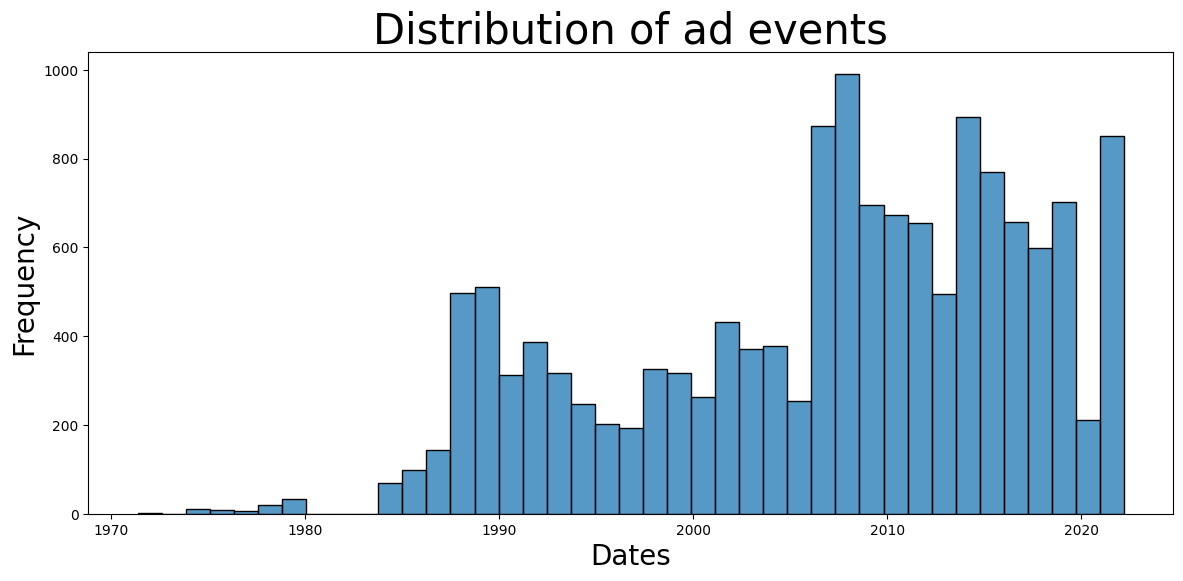

In [42]:
z = switzerland_sw["start_date"]
plt.figure(figsize=(14,6))
sns.histplot(z)
plt.title("Distribution of ad events", size=30)
plt.ylabel("Frequency", size=20)
plt.xlabel("Dates", size=20);

In [40]:
switzerland_sw = switzerland_sw[switzerland_sw["start_date"].dt.year >2000] 

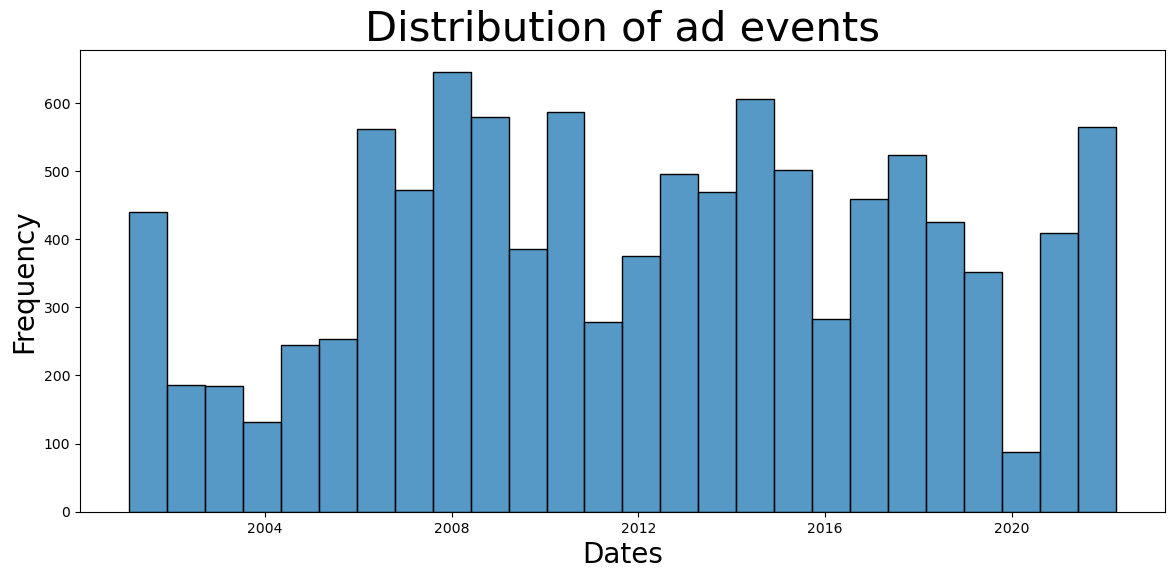

In [47]:
z = switzerland_sw["start_date"]
plt.figure(figsize=(14,6))
sns.histplot(z)
plt.title("Distribution of ad events", size=30)
plt.ylabel("Frequency", size=20)
plt.xlabel("Dates", size=20);

### Changing the data frame 

In [43]:
switzerland_sw.isna().any()

_id               False
PlayerName        False
Born              False
Height            False
Hand              False
LinkPlayer        False
Tournament        False
Location          False
Date              False
Ground            False
Prize             False
GameRound         False
GameRank          False
Oponent           False
WL                False
Score             False
Score_1           False
Numero_sets       False
start_date        False
end_date          False
tornament_days    False
dtype: bool

In [44]:
switzerland_sw.columns

C:\Users\berna\AppData\Local\Temp\ipykernel_8864\2074996301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['GameID'] = switzerland_sw['Tournament'] + '_' + switzerland_sw['Location'] + '_' + switzerland_sw['start_date'].astype(str) + '_' + switzerland_sw['Ground']  + '_' + switzerland_sw['GameRound'].astype(str) + '_' + switzerland_sw['Numero_sets'].astype(str)+ '_' + switzerland_sw['Score_1'].astype(str)


### Putting in the same row the two players from the same game 

In [45]:
switzerland_sw.head(2)

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,...,GameRound,GameRank,Oponent,WL,Score,Score_1,Numero_sets,start_date,end_date,tornament_days
769,624ab34913b144c54b3c9dbb,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,...,Semi-Finals,32,Kei Nishikori,L,"62 67, 06",626706,3,2011-10-31,2011-11-06,6
770,624ab34913b144c54b3c9dbc,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,...,Quarter-Finals,59,Marcos Baghdatis,W,26 62 63,266263,3,2011-10-31,2011-11-06,6


In [41]:
switzerland_sw_winner = switzerland_sw[switzerland_sw['WL'] == 'W']
switzerland_sw_losser = switzerland_sw[switzerland_sw['WL'] == 'L']

In [51]:
switzerland_sw_winner['GameId'] = switzerland_sw_winner['Tournament'] + '_' + switzerland_sw_winner['Location'] + '_' + switzerland_sw_winner['Ground'] + '_' + \
               switzerland_sw_winner['Prize'].astype(str) + '_' + switzerland_sw_winner['GameRound'] + '_' + switzerland_sw_winner['Numero_sets'].astype(str) + \
               '_' + switzerland_sw_winner['tornament_days'].astype(str) + '_' + switzerland_sw_winner['PlayerName']

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_9065/306243031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw_winner['GameId'] = switzerland_sw_winner['Tournament'] + '_' + switzerland_sw_winner['Location'] + '_' + switzerland_sw_winner['Ground'] + '_' + \


In [53]:
switzerland_sw_losser['GameId'] = switzerland_sw_losser['Tournament'] + '_' + switzerland_sw_losser['Location'] + '_' + switzerland_sw_losser['Ground'] + '_' + \
               switzerland_sw_losser['Prize'].astype(str) + '_' + switzerland_sw_losser['GameRound'] + '_' + switzerland_sw_losser['Numero_sets'].astype(str) + \
               '_' + switzerland_sw_losser['tornament_days'].astype(str) + '_' + switzerland_sw_losser['Oponent']

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_9065/3755257034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw_losser['GameId'] = switzerland_sw_losser['Tournament'] + '_' + switzerland_sw_losser['Location'] + '_' + switzerland_sw_losser['Ground'] + '_' + \


In [59]:
switzerland_sw.columns

Index(['_id', 'PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer',
       'Tournament', 'Location', 'Date', 'Ground', 'Prize', 'GameRound',
       'GameRank', 'Oponent', 'WL', 'Score', 'Score_1', 'Numero_sets',
       'start_date', 'end_date', 'tornament_days'],
      dtype='object')

In [61]:
player_1 = ['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer','Tournament', 'Location', 'Date', 'Ground', 'Prize', 'GameRound','GameRank','Score', 'Score_1', 'Numero_sets',
       'start_date', 'end_date', 'tornament_days','GameId']
player_2 = ['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer','GameRank','GameId']
switzerland_f = pd.merge(switzerland_sw_winner[player_1], switzerland_sw_losser[player_2], on='GameId', how='inner')

In [62]:
switzerland_f

,PlayerName_x,Born_x,Height_x,Hand_x,LinkPlayer_x,Tournament,Location,Date,Ground,Prize,GameRound,GameRank_x,Score,Score_1,Numero_sets,start_date,end_date,tornament_days,GameId,PlayerName_y,Born_y,Height_y,Hand_y,LinkPlayer_y,GameRank_y
0,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"$1,308,100",Round of 16,64,61 62,6162,2,2011-10-31,2011-11-06,6,"Basel_Basel, Switzerland_Hard_$1,308,100_Round...",Lukasz Kubot,"Boleslawiec, Poland",191,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/lukasz-kubo...,1
1,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"$1,308,100",Round of 32,47,62 46 75,624675,3,2011-10-31,2011-11-06,6,"Basel_Basel, Switzerland_Hard_$1,308,100_Round...",Xavier Malisse,"Kortrijk, Belgium",185,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/xavier-mali...,1
2,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2010.11.01 - 2010.11.07,Hard,"$1,225,000",Semi-Finals,32,"76, 64",7664,2,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_$1,225,000_Semi-...",Viktor Troicki,"Belgrade, Serbia",193,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/viktor-troi...,3
3,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2010.11.01 - 2010.11.07,Hard,"$1,225,000",Quarter-Finals,66,62 63,6263,2,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_$1,225,000_Quart...",Robin Haase,"The Hague, The Netherlands",191,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/robin-haase...,3
4,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2010.11.01 - 2010.11.07,Hard,"$1,225,000",Round of 32,26,64 62,6462,2,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_$1,225,000_Round...",Ernests Gulbis,"Riga, Latvia",191,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/ernests-gul...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5556,Juan Manuel Benitez Chavarriaga,"Medellin, Colombia",NA,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/juan-manuel...,Switzerland F3,"Collonge-Bellerive, Switzerland",2017.08.14 - 2017.08.20,Clay,"$15,000",Round of 16,1011,63 63,6363,2,2017-08-14,2017-08-20,6,"Switzerland F3_Collonge-Bellerive, Switzerland...",Loic Perret,Noumea,188,"Right-Handed, One-Handed Backhand",https://www.atptour.com/en/players/loic-perret...,646
5557,Marvin Moeller,"Hamburg, Germany",178,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/marvin-moel...,M25 Trimbach,"Trimbach, Switzerland",2021.03.08 - 2021.03.14,Carpet,"$25,000",Round of 32,1298,"61 67, 62",616762,3,2021-03-08,2021-03-14,6,"M25 Trimbach_Trimbach, Switzerland_Carpet_$25,...",Patrik Hartmeier,,NA,null,https://www.atptour.com/en/players/patrik-hart...,614
5558,Marvin Moeller,"Hamburg, Germany",178,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/marvin-moel...,Switzerland F5,"Sion, Switzerland",2017.08.28 - 2017.09.03,Clay,"$15,000",Round of 32,545,"61 67, 63",616763,3,2017-08-28,2017-09-03,6,"Switzerland F5_Sion, Switzerland_Clay_$15,000_...",Pascal Meis,Traunstein,180,"Left-Handed, One-Handed Backhand",https://www.atptour.com/en/players/pascal-meis...,1128
5559,Maxence Beauge,"Marzy, France",183,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/maxence-bea...,Switzerland F3,"Collonge-Bellerive, Switzerland",2017.08.14 - 2017.08.20,Clay,"$15,000",Round of 32,941,

In [57]:
len(switzerland_sw)

10505

In [58]:
len(switzerland_sw)/2

5252.5

In [49]:
pd.set_option('display.max_columns', 100)

In [ ]:
Tournament
Location
Ground
Prize
GameRound
Numero_sets
tornament_days
Player / Oponent

In [42]:
len(switzerland_sw_losser)

5190

In [43]:
len(switzerland_sw_winner)

5315

In [50]:
switzerland_sw_winner.head()

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1,Numero_sets,start_date,end_date,tornament_days
770,624ab34913b144c54b3c9dbc,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"$1,308,100",Quarter-Finals,59,Marcos Baghdatis,W,26 62 63,266263,3,2011-10-31,2011-11-06,6
771,624ab34913b144c54b3c9dbd,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"$1,308,100",Round of 16,64,Lukasz Kubot,W,61 62,6162,2,2011-10-31,2011-11-06,6
772,624ab34913b144c54b3c9dbe,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"$1,308,100",Round of 32,47,Xavier Malisse,W,62 46 75,624675,3,2011-10-31,2011-11-06,6
859,624ab34913b144c54b3c9e15,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2010.11.01 - 2010.11.07,Hard,"$1,225,000",Semi-Finals,32,Viktor Troicki,W,"76, 64",7664,2,2010-11-01,2010-11-07,6
860,624ab34913b144c54b3c9e16,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2010.11.01 - 2010.11.07,Hard,"$1,225,000",Quarter-Finals,66,Robin Haase,W,62 63,6263,2,2010-11-01,2010-11-07,6


In [46]:
switzerland_sw.duplicated("GameID")

769        False
770        False
771        False
772        False
858        False
           ...  
1305459    False
1305472     True
1306059    False
1308683     True
1308685     True
Length: 14462, dtype: bool

In [47]:
switzerland_sw.iloc[13054]

_id                                        624ab48d34db660beab27544
PlayerName                                             Marko Ostoja
Born                                                  Bonn, Germany
Height                                                          175
Hand                                 Right-Handed, Unknown Backhand
LinkPlayer        https://www.atptour.com/en/players/marko-ostoj...
Tournament                                                   Gstaad
Location                                        Gstaad, Switzerland
Date                                        1989.07.10 - 1989.07.16
Ground                                                         Clay
Prize                                                      $275,000
GameRound                                               Round of 32
GameRank                                                          9
Oponent                                                Jakob Hlasek
WL                                              

In [48]:
switzerland_sw_losser.head()

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,...,GameRound,GameRank,Oponent,WL,Score,Score_1,Numero_sets,start_date,end_date,tornament_days


In [74]:
grouped_sw

,index,G_a,P_l,P_l,O_p,T_o,L_o,s_t,e_n,t_o,G_r,P_r,G_a,S_c,S_c,N_u
0,0,"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_C...",Roger Federer,Roger Federer,Lleyton Hewitt,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,"26 63 67, 16",26636716,4
1,1,"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_C...",Lleyton Hewitt,Lleyton Hewitt,George Bastl,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,46 63 62 64,46636264,4
2,2,"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_C...",Mark Philippoussis,Mark Philippoussis,Roger Federer,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,"46 67, 64 46",46676446,4
3,3,"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_C...",Lleyton Hewitt,Lleyton Hewitt,Roger Federer,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,"62 36 76, 61",62367661,4
4,4,"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_C...",George Bastl,George Bastl,Lleyton Hewitt,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,64 36 26 46,64362646,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,13639,USR V SUI EAZ_Switzerland_1991-04-29_Carpet_Ro...,Marc Rosset,Marc Rosset,Andrei Cherkasov,USR V SUI EAZ,Switzerland,1991-04-29,1991-05-05,6,Carpet,,Round Robin,46 46,4646,2
13640,13640,USR V SUI EAZ_Switzerland_1991-04-29_Carpet_Ro...,Andrei Chesnokov,Andrei Chesnokov,Jakob Hlasek,USR V SUI EAZ,Switzerland,1991-04-29,1991-05-05,6,Carpet,,Round Robin,63 64,6364,2
13641,13641,USR V SUI EAZ_Switzerland_1991-04-29_Carpet_Ro...,Andrei Cherkasov,Andrei Cherkasov,Marc Rosset,USR V SUI EAZ,Switzerland,1991-04-29,1991-05-05,6,Carpet,,Round Robin,64 64,6464,2
13642,13642,USR V SUI EAZ_Switzerland_1991-04-29_Carpet_Ro...,Andrei Cherkasov,Andrei Cherkasov,Jakob Hlasek,USR V SUI EAZ,Switzerland,1991-04-29,1991-05-05,6,Carpet,,Round Robin,57 57 36,575736,3


In [82]:
grouped_sw = switzerland_sw.groupby('GameID').agg({
    'PlayerName': 'first',
    'Oponent':'first',
    'Tournament': 'first',
    'Location': 'first',
    'start_date': 'first',
    'end_date': 'first',
    'tornament_days': 'first',
    'Ground': 'first',
    'Prize': 'first',
    'GameRound': 'first',
    'Score': 'first',
    'Score_1': 'first',
    'Numero_sets': 'first'
})

In [83]:
grouped_sw.head()

,PlayerName,Oponent,Tournament,Location,start_date,end_date,tornament_days,Ground,Prize,GameRound,Score,Score_1,Numero_sets
GameID,,,,,,,,,,,,,
"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_Carpet_Round Robin_4_26636716",Roger Federer,Lleyton Hewitt,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,"26 63 67, 16",26636716,4
"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_Carpet_Round Robin_4_46636264",Lleyton Hewitt,George Bastl,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,46 63 62 64,46636264,4
"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_Carpet_Round Robin_4_46676446",Mark Philippoussis,Roger Federer,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,"46 67, 64 46",46676446,4
"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_Carpet_Round Robin_4_62367661",Lleyton Hewitt,Roger Federer,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,"62 36 76, 61",62367661,4
"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_Carpet_Round Robin_4_64362646",George Bastl,Lleyton Hewitt,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,64 36 26 46,64362646,4


In [84]:
grouped_sw.columns = [f'{col[0]}_{col[1]}' for col in grouped_sw.columns]

In [85]:
grouped_sw = grouped_sw.reset_index()

In [86]:
grouped_sw

,GameID,P_l,O_p,T_o,L_o,s_t,e_n,t_o,G_r,P_r,G_a,S_c,S_c,N_u
0,"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_C...",Roger Federer,Lleyton Hewitt,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,"26 63 67, 16",26636716,4
1,"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_C...",Lleyton Hewitt,George Bastl,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,46 63 62 64,46636264,4
2,"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_C...",Mark Philippoussis,Roger Federer,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,"46 67, 64 46",46676446,4
3,"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_C...",Lleyton Hewitt,Roger Federer,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,"62 36 76, 61",62367661,4
4,"AUS V SUI 1RD_Zurich, Switzerland_2000-01-31_C...",George Bastl,Lleyton Hewitt,AUS V SUI 1RD,"Zurich, Switzerland",2000-01-31,2000-02-06,6,Carpet,,Round Robin,64 36 26 46,64362646,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,USR V SUI EAZ_Switzerland_1991-04-29_Carpet_Ro...,Marc Rosset,Andrei Cherkasov,USR V SUI EAZ,Switzerland,1991-04-29,1991-05-05,6,Carpet,,Round Robin,46 46,4646,2
13640,USR V SUI EAZ_Switzerland_1991-04-29_Carpet_Ro...,Andrei Chesnokov,Jakob Hlasek,USR V SUI EAZ,Switzerland,1991-04-29,1991-05-05,6,Carpet,,Round Robin,63 64,6364,2
13641,USR V SUI EAZ_Switzerland_1991-04-29_Carpet_Ro...,Andrei Cherkasov,Marc Rosset,USR V SUI EAZ,Switzerland,1991-04-29,1991-05-05,6,Carpet,,Round Robin,64 64,6464,2
13642,USR V SUI EAZ_Switzerland_1991-04-29_Carpet_Ro...,Andrei Cherkasov,Jakob Hlasek,USR V SUI EAZ,Switzerland,1991-04-29,1991-05-05,6,Carpet,,Round Robin,57 57 36,575736,3


In [87]:
columns =  ['GameID', 'Player1', 'Player2','Tournament','Location','start_date', 'end_date', 'tornament_days', 'Ground','Prize','GameRound','Score', 'Score_1','Numero_sets']
grouped_sw.columns = columns
grouped_sw = grouped_sw[['Player1', 'Player2', 'Tournament', 'Location', 'start_date', 'end_date', 'tornament_days', 'Ground', 'Prize', 'GameRound', 'Score', 'Score_1', 'Numero_sets', 'GameID']]

In [88]:
len(grouped_sw.drop_duplicates('GameID'))

13644

In [89]:
len(grouped_sw)

13644

In [90]:
len(switzerland_sw)

14462

In [91]:
switzerland_sw[(switzerland_sw["Date"] == '2011.10.31 - 2011.11.06') & (switzerland_sw["GameRound"] == 'Semi-Finals')]

Player1           Player2     Tournament  \
0           Roger Federer    Lleyton Hewitt  AUS V SUI 1RD   
1          Lleyton Hewitt      George Bastl  AUS V SUI 1RD   
2      Mark Philippoussis     Roger Federer  AUS V SUI 1RD   
3          Lleyton Hewitt     Roger Federer  AUS V SUI 1RD   
4            George Bastl    Lleyton Hewitt  AUS V SUI 1RD   
...                   ...               ...            ...   
13639         Marc Rosset  Andrei Cherkasov  USR V SUI EAZ   
13640    Andrei Chesnokov      Jakob Hlasek  USR V SUI EAZ   
13641    Andrei Cherkasov       Marc Rosset  USR V SUI EAZ   
13642    Andrei Cherkasov      Jakob Hlasek  USR V SUI EAZ   
13643        Jakob Hlasek  Andrei Cherkasov  USR V SUI EAZ   

       Height                               Hand  \
769       188  Right-Handed, Two-Handed Backhand   
17134     185  Right-Handed, One-Handed Backhand   
32110     178  Right-Handed, Two-Handed Backhand   
125636    183  Right-Handed, One-Handed Backhand   

                                               LinkPlayer Tournament  \
769     https://www.atptour.com/en/players/novak-djoko...      Basel   
17134   https://www.atptour.com/en/players/roger-feder...      Basel   
32110   https://www.atptour.com/en/players/kei-nishiko...      Basel   
125636  https://www.atptour.com/en/players/stan-wawrin...      Basel   

                  Location                     Date Ground  ...    GameRound  \
769     Basel, Switzerland  2011.10.31 - 2011.11.06   Hard  ...  Semi-Finals   
17134   Basel, Switzerland  2011.10.31 - 2011.11.06   Hard  ...  Semi-Finals   
32110   Basel, Switzerland  2011.10.31 - 2011.11.06   Hard  ...  Semi-Finals   
125636  Basel, Switzerland  2011.10.31 - 2011.11.06   Hard  ...  Semi-Finals   

       GameRank         Oponent WL       Score Score_1 Numero_sets  \
769          32   Kei Nishikori  L  62 67,  06  626706           3   
17134        19   Stan Wawrinka  W     76,  62    7662           2   
32110         1  Novak Djokovic  W  26 76,  60  267660           3   
125636        4   Roger Federer  L     67,  26    6726           2   

        start_date   end_date tornament_days  
769     2011-10-31 2011-11-06              6  
17134   2011-10-31 2011-11-06              6  
32110   2011-10-31 2011-11-06              6  
125636  2011-10-31 2011-11-06              6  

[4 rows x 21 columns]